In [310]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sympy import randprime, gcd
from random import randrange, getrandbits

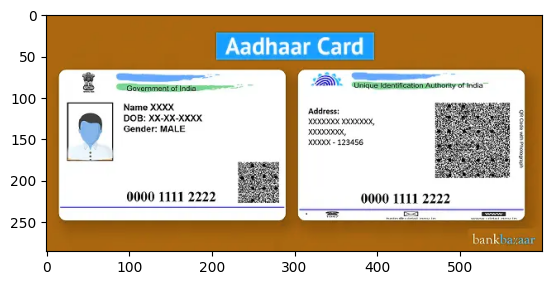

In [311]:
my_img = cv2.imread('aadhar.jpg')
plt.imshow(my_img, cmap="gray")

In [312]:
#RSA
# STEP 1: Generate Two Large Prime Numbers (p,q) randomly
# 
def power (a, d, n):
  ans=1
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans

def generatePrimeNumber(length):
    return randprime(2**(length-1), 2**length)

length = 5
P = generatePrimeNumber(length)
Q = generatePrimeNumber(length)

while (P == Q):
  Q = generatePrimeNumber(length)

print(P)
print(Q)

29
17


In [313]:
#Step 2: Calculate N=P*Q and Euler Totient Function = (P-1)*(Q-1)
N = P * Q
eulerTotient = (P - 1) * (Q - 1)
print(N)
print(eulerTotient)

493
448


In [314]:
#Step 3: Find E such that GCD(E,eulerTotient)=1(i.e., e should be co-prime) such that it satisfies this condition:-  1<E<eulerTotient

E = generatePrimeNumber(4)
while gcd(E, eulerTotient) != 1:
    E = generatePrimeNumber(4)
print(E)

13


In [315]:
# Step 4: Find D. 
#For Finding D: It must satisfies this property:-  (D*E)Mod(eulerTotient)=1;
#Now we have two Choices
# 1. That we randomly choose D and check which condition is satisfying above condition.
# 2. For Finding D we can Use Extended Euclidean Algorithm: ax+by=1 i.e., eulerTotient(x)+E(y)=GCD(eulerTotient,e)
#Here, Best approach is to go for option 2.( Extended Euclidean Algorithm.)

def gcdExtended(E, eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:

    # k
    k=(d1//d2)

    #a
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    #b
    temp=b2
    b2=b1-(b2*k)
    b1=temp

    #d
    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


In [316]:
D = gcdExtended(E, eulerTotient)
print(D)

enc = [[0 for x in range(3000)] for y in range(3000)]

rows, cols, channels = my_img.shape
print (rows)
print (cols)

69


286
600


In [317]:
#Step 5: Encryption

#C = P^E Mod (N)

for i in range(rows):
  for j in range(cols):
    r, g, b = my_img[i,j]
    C1 = power (r, E, N)
    C2 = power (g, E, N)
    C3 = power (b, E, N)
    enc[i][j]=[C1, C2, C3]
    C1 = C1%256
    C2 = C2%256
    C3 = C3%256
    my_img[i,j] = [C1, C2, C3]


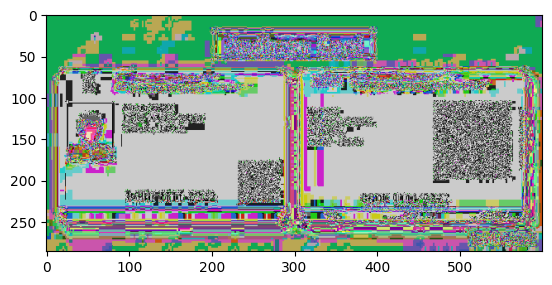

In [318]:
cv2.imwrite ('encrypted_image.jpg', my_img)
plt.imshow (my_img, cmap="gray")

In [319]:
#Step 6: Decryption

#P = C^D Mod (N)

for i in range(rows):
  for j in range(cols):
    r, g, b = enc[i][j]
    M1 = power(r, D, N)
    M2 = power(g, D, N)
    M3 = power(b, D, N)
    my_img[i, j] = [M1, M2, M3]

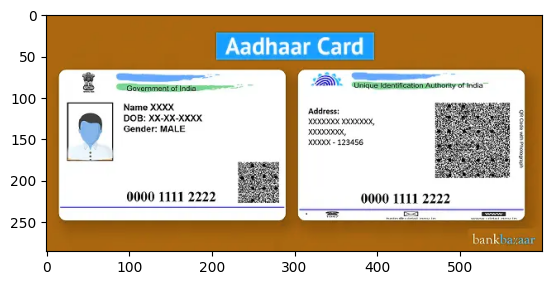

In [320]:
cv2.imwrite('decrypted_image.jpg', my_img)
plt.imshow(my_img, cmap="gray")